In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Clientes_v2.csv', sep=';')
df.head()

#Realizo un chequeo rapido de los datos con head o tambien se puede aplicar tail

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,2673,Córdoba,LUISA JACQUELINE RODRIGUEZ,CALLE PUBLICA S/NÂº CNO.PAJAS BLANCAS KM.22 P...,NaN,39,PAJAS BLANCAS,"-64,27472312","-31,21598674",NaN
1,2674,NaN,ALFREDO ALBERTO RUIZ,CALLE PUBLICA S/NÂº LA PUERTA P/RUTA PROV.74A,15647073,54,NaN,"-64,06718896","-31,16495027",NaN
2,2675,Córdoba,FLAVIO DIAZ,CALLE PUBLICA S/NÂº EL ALGODONAL P/AGUA DE ORO,493844,39,AGUA DE ORO,"-64,31021262","-31,06210188",NaN
3,2676,Córdoba,WALTER RUIZ,CALLE PUBLICA S/NÂº RUTA A 74 KM 27,4902949,15,COLONIA TIROLESA,"-64,06759299","-31,22827701",NaN
4,2677,Córdoba,MARCELA ROGALO,CALLE PUBLICA CNO. CHACRA DE LA MERCED - KM.18,4918549DIR,46,VILLA CORAZON DE MARIA,"-63,9973238","-31,44517527",NaN


In [36]:
df = df.dropna(axis=1, how='all')
df.head(2)

#Dropeo columnas innecesarias las cuales solo tengan todas las row NaN

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
0,2673,Córdoba,LUISA JACQUELINE RODRIGUEZ,CALLE PUBLICA S/NÂº CNO.PAJAS BLANCAS KM.22 P...,NaN,39,PAJAS BLANCAS,"-64,27472312","-31,21598674"
1,2674,NaN,ALFREDO ALBERTO RUIZ,CALLE PUBLICA S/NÂº LA PUERTA P/RUTA PROV.74A,15647073,54,NaN,"-64,06718896","-31,16495027"


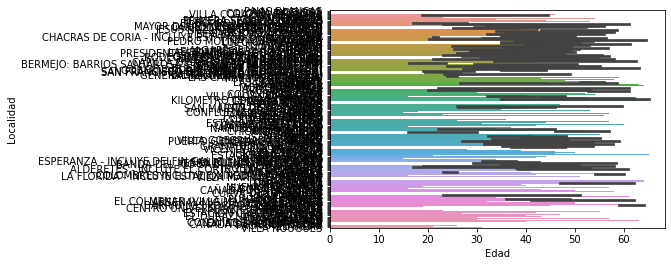

Hay 6507 valores documentados y 108 valores vacios, teniendo un total de 6615


In [38]:
valores_not_nan =sum(df.count())
valores_nan= df.isna().sum().sum()
valores=(valores_nan, valores_not_nan)
total_valores= sum(valores)

print("Hay %d valores documentados y %d valores vacios, teniendo un total de %d" % (valores_not_nan, valores_nan, total_valores))


In [50]:
def percentage(part, whole):
    porcentaje = round(100* float(part)/float(whole), 2)
    return porcentaje

per_valoresd= percentage(valores_not_nan, total_valores)
per_valoresn= percentage(valores_nan, total_valores)

print(per_valoresd, per_valoresn)

98.37 1.63


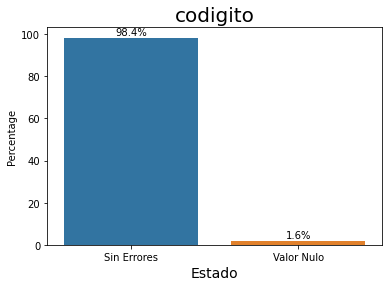

In [59]:
data= [{'Percentage': per_valoresd},{'Percentage': per_valoresn}]
df1= pd.DataFrame(data, index= ["Sin Errores", "Valor Nulo"])
ax = sns.barplot(x=df1.index, y=df1.Percentage)

#inserta nombre del archivo a comparar
comparacion=input("Como se llama su archivo?")
plt.title(comparacion, fontsize=20)

plt.xlabel('Estado', size=14)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / 100:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()